In [2]:
import seaborn as sns
import numpy as np
df =sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64","int64"]) #  tip seçimi yapılır
df = df.dropna() #eksik değerleri siler 
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='table'>

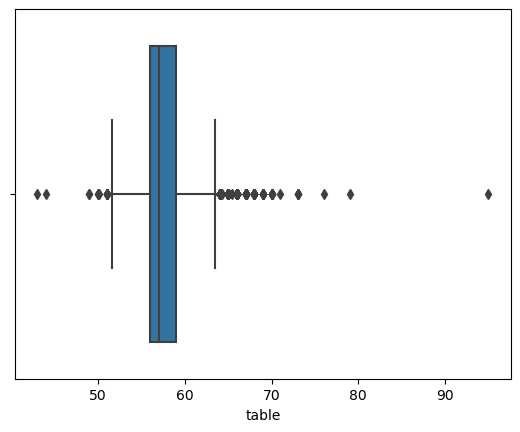

In [3]:
dft=df["table"]
sns.boxplot(x=dft) #aykırı değerler yani eşik değerler mavinin sağındaki ve solundaki ince çizgilerin aşılan yerleri yaklaşşık 63ün üstü ve
#52nin altı    

In [4]:
Q1=dft.quantile(0.25)
Q3=dft.quantile(0.75)
IQR=Q3-Q1


In [7]:
Q1


56.0

In [8]:
Q3

59.0

In [9]:
IQR

3.0

In [5]:
altsinir=Q1-1.5*IQR
ustsinir=Q3+1.5*IQR


In [13]:
altsinir

51.5

In [14]:
ustsinir

63.5

In [15]:
dft<altsinir #alt sınır sorgulaması yapıldı  dftnin üst ve alt sınırı hep falselar çünkü hep aykırı değerleri ggösterirler

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [16]:
dft>ustsinir

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [6]:
a=dft<altsinir
dft[a]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [7]:
import pandas as pd

In [8]:
dft=pd.DataFrame(dft)

In [23]:
dft

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [9]:
tilldadf=dft[~((dft<altsinir)|(dft>ustsinir)).any(axis =1 )]#tillda işareti aykırı olmayan değerleri göstermeye yarar
tilldadf  #siilme işlemş yapıldı

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [10]:
a.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [11]:
dft[a]

,table
1515,51.0
3238,50.1
3979,51.0
4150,51.0
5979,49.0
7418,50.0
8853,51.0
11368,43.0
22701,49.0
25179,50.0


In [12]:
dft[a] = dft.mean()
dft[a]  #aykırılar yakalnanınca alt sinir ve üst sınır değerine eşitlenir ve bazen aykırı değerleri silmek yerine 
# baskılama ile böyle ortalamaya atamak ve aksiyon almak mantıklı olabiliyor 
#sınırları baskılayarak onu özüne yani veri setinde tutabiliriz

,table
1515,57.457184
3238,57.457184
3979,57.457184
4150,57.457184
5979,57.457184
7418,57.457184
8853,57.457184
11368,57.457184
22701,57.457184
25179,57.457184


In [13]:
dft[a] = altsinir
dft[a]

,table
1515,51.5
3238,51.5
3979,51.5
4150,51.5
5979,51.5
7418,51.5
8853,51.5
11368,51.5
22701,51.5
25179,51.5


In [14]:
from sklearn.neighbors import LocalOutlierFactor

In [15]:
clr=LocalOutlierFactor(n_neighbors=20  , contamination=0.1)#komşuluk ve yoğunluk argüman

In [16]:
clr.fit_predict(df)# algoritmayı çalıştırmak

array([-1, -1, -1, ...,  1,  1,  1])

In [17]:
clrscore=clr.negative_outlier_factor_ #eşik değer kabul edilebilecek yoğunluk skorları
clrscore[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [18]:
np.sort(clrscore[0:10]) # en hızlı azalış 1.33 de gerçekleşmiş en net karar burada verilir belki 133 seçilip diğerleri aykırı olab

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706])

In [19]:
np.sort(clrscore)[0:10]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387])

In [20]:
esikdeger=np.sort(clrscore)[13] #en hızlı azalma 13.indexte var diğerleri aykırı değer  13 sınır

In [27]:
a = clrscore > esikdeger #burası aykrı değerlerdir
a  # esik değerden yükseklerin hepsi aynı çıkar   #eşik değerlerin üstünde aykırı olmayan değerlere erişmektir 

array([ True,  True,  True, ...,  True,  True,  True])

In [22]:
b = clrscore < esikdeger
b

array([False, False, False, ..., False, False, False])

In [23]:
newdf =df [clrscore > esikdeger]
newdf #eşik değerlerin üstünde aykırı olmayan değerlere erişmektir 

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [26]:
baskideger=df[clrscore ==esikdeger] #aykırı gözlem yerine bu eşik değeri atayabiliriz

In [34]:
aykirilar=df[~a] #aykırı değer bulyoruz elde baskı değerler var bu baskı değerleri sınırlardan baskılayacağız
#aykrıılar dataframi indexsiz arraya çevirecez  baskı gözlemini de arraylaştirip atama işlemi olacak 
#son basamak aykırı değerleri baskı değerle eşitlemiş olacaz

In [35]:
res=aykirilar.to_records(index=False )

In [36]:
res[:]=baskideger.to_records(index=False ) #tüm değerleri baskı değerle doldurma işlemi yapıldı yani baskı gözlemini arraylaştirip
res  #atama işlemi yapıdı

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [37]:
df [~a]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [ ]:
df[~a]=pd.DataFrame(res,index=df[~a].index)  #burada indexleme işlemide yapılmalı çünkü önceki ssten mavi alanlarda index yok falselamıştık

In [38]:
df[~a]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
